<a href="https://colab.research.google.com/github/CNielsen94/Random_data_repo/blob/main/notebooks/Distributioner_Python_l%C3%B8sninger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.1



**a. Hvad er forskellen på sandsynlighedsfunktionen og tæthedsfunktionen (probability density function)?**<br>
Sandsynlighedsfunktionen (ofte refereret til som sandsynlighedsmassefunktionen for diskrete variable) giver sandsynligheden for, at en stokastisk variabel antager en specifik værdi. For diskrete tilfælde summer sandsynlighederne for alle mulige udfald til 1.

Tæthedsfunktionen (probability density function, PDF) er anvendt for kontinuerlige stokastiske variabler og beskriver, hvordan sandsynlighederne er fordelt over forskellige værdier af den stokastiske variabel. Da kontinuerlige variabler kan antage et uendeligt antal værdier inden for ethvert interval, giver tæthedsfunktionen ikke sandsynligheden for en specifik værdi, men sandsynligheden for at falde inden for et bestemt interval kan findes ved at integrere tæthedsfunktionen over intervallet.

**b. Hvordan kan tæthedsfunktionen beskrives grafisk?**<br>
Grafisk kan tæthedsfunktionen beskrives som en kurve, hvor hver punkt på kurven repræsenterer tætheden af sandsynligheden ved den givne værdi. Kurvens form kan variere afhængigt af distributionen, men arealet under kurven inden for et interval repræsenterer sandsynligheden for at den stokastiske variabel falder inden for det interval. For at kurven kan repræsentere en gyldig tæthedsfunktion, skal arealet under hele kurven være lig med 1.

**c. Hvad beskriver området under tæthedsfunktionen for kontinuerlige, stokastiske variabler?**<br>
Området under tæthedsfunktionen for kontinuerlige, stokastiske variabler beskriver sandsynligheden for, at den stokastiske variabel vil falde inden for et specifikt interval. Dette område kan findes ved at integrere tæthedsfunktionen over det ønskede interval. Det er vigtigt at forstå, at for en kontinuerlig variabel, er sandsynligheden for at antage en præcis værdi teknisk set 0, da der er uendeligt mange mulige værdier. Derfor fokuserer vi på sandsynligheden for at falde inden for intervaller, når vi arbejder med kontinuerlige variabler.

#8.5

##Tekst forklaring

Givet en stokastisk variabel $X$, som har en uniform fordeling mellem 100 og 150, kan vi beregne følgende:

**a. Lav tæthedsfunktionen**

For en uniform fordeling mellem $a = 100$ og $b = 150$, er tæthedsfunktionen (PDF) givet ved:
$f(x) = \frac{1}{b - a} = \frac{1}{150 - 100} = \frac{1}{50}$
Dette betyder, at sandsynlighedstætheden er konstant og lig $\frac{1}{50}$ for alle $x$ i intervallet [100, 150].

**b. Find $P(X > 110)$**

Dette er sandsynligheden for at $X$ er større end 110. Vi beregner denne sandsynlighed som:
$P(X > 110) = \frac{150 - 110}{50} = \frac{40}{50} = 0.8$

**c. Find $P(120 < X < 135)$**

Dette er sandsynligheden for at $X$ falder indenfor intervallet [120, 135]. Vi beregner denne sandsynlighed som:
$P(120 < X < 135) = \frac{135 - 120}{50} = \frac{15}{50} = 0.3$

**d. Find $P(X < 122)$**

Dette er sandsynligheden for at $X$ er mindre end 122. Vi beregner denne sandsynlighed som:
$P(X < 122) = \frac{122 - 100}{50} = \frac{22}{50} = 0.44$

Disse beregninger udnytter egenskaberne ved den uniforme fordeling, hvor hvert punkt inden for det definerede interval har lige stor sandsynlighed for at blive observeret.


##Python besvarelse

In [45]:
# Definerer parametre for uniform fordeling
a = 100
b = 150

# Tæthedsfunktionen for uniform fordeling
f_x = 1 / (b - a)
f_x

0.02

In [46]:
# Beregner sandsynlighederne
# b. P(X > 110)
P_X_gt_110 = (b - 110) * f_x
P_X_gt_110

0.8

In [47]:
# c. P(120 < X < 135)
P_120_lt_X_lt_135 = (135 - 120) * f_x
P_120_lt_X_lt_135

0.3

In [48]:
# d. P(X < 122)
P_X_lt_122 = (122 - a) * f_x
P_X_lt_122

0.44

##Eksempel på visualisering

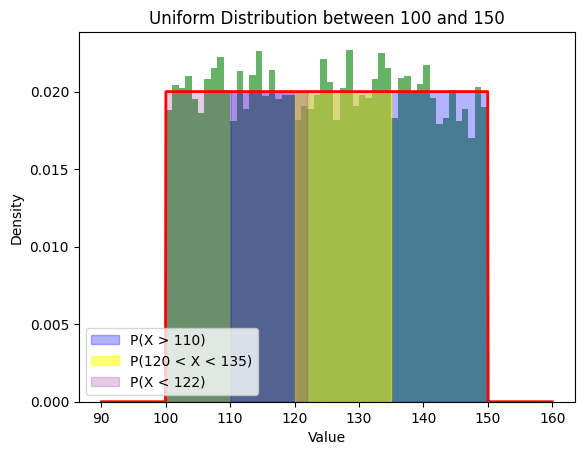

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generer 10000 tilfældige data punkter fra en uniform fordeling mellem 100 og 150
data = np.random.uniform(a, b, 10000)

# Tegn histogrammet for de genererede data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Generer x værdier for PDF-kurven
x_values = np.linspace(90, 160, 1000)
# Beregn y værdier (PDF værdier) for x værdierne, baseret på tæthedsfunktionen
y_values = [f_x if 100 <= x <= 150 else 0 for x in x_values]

# Tegn PDF-kurven på samme plot som histogrammet
plt.plot(x_values, y_values, 'r-', lw=2)

plt.title('Uniform Distribution between 100 and 150')
plt.xlabel('Value')
plt.ylabel('Density')

# Markér områderne beskrevet i opgaverne
plt.fill_between(x_values, 0, y_values, where=(x_values > 110), color='blue', alpha=0.3, label='P(X > 110)')
plt.fill_between(x_values, 0, y_values, where=(x_values > 120) & (x_values < 135), color='yellow', alpha=0.5, label='P(120 < X < 135)')
plt.fill_between(x_values, 0, y_values, where=(x_values < 122), color='purple', alpha=0.2, label='P(X < 122)')

plt.legend()
plt.show()

På plottet ses histogrammet, der viser fordelingen af værdier genereret fra den uniforme fordeling, samt den røde linje, der repræsenterer den teoretiske sandsynlighedstæthedsfunktion. De farvede områder illustrerer de specifikke sandsynligheder.

#8.20

##Tekst forklaring

For at finde sandsynligheden $P(Z < 1.60)$, hvor $Z$ er en standard normalfordelt stokastisk variabel, anvender vi den kumulative fordelingsfunktion (CDF). Den kumulative fordelingsfunktion for en standard normalfordeling angiver sandsynligheden for, at $Z$ vil være mindre end eller lig med en given værdi.

Formlen for CDF for en standard normalfordeling er ikke simpel at udtrykke i en lukket form, men den kan beregnes effektivt med statistisk software eller ved at slå op i standard normalfordelingstabeller. Den kumulative sandsynlighed $P(Z < z)$ for en værdi $z$ kan findes direkte ved at anvende disse metoder.

##Python besvarelse

In [50]:
from scipy.stats import norm

# Beregner P(Z < 1.60) for en standard normalfordelt variabel Z
P_Z_lt_1_60 = norm.cdf(1.60)

P_Z_lt_1_60

0.945200708300442

##Visualisering

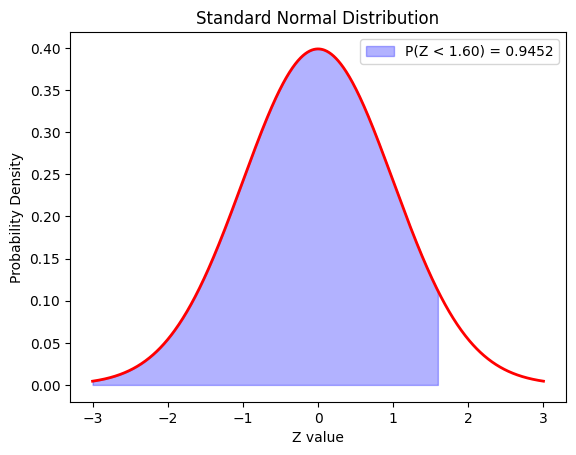

In [51]:
# Generer x-værdier for en standard normalfordeling
x = np.linspace(-3, 3, 1000)
# Beregn PDF for standard normalfordeling
pdf = norm.pdf(x)

# Plot PDF for standard normalfordeling
plt.plot(x, pdf, 'r-', lw=2)

# Fyld området for P(Z < 1.60)
plt.fill_between(x, pdf, where=(x<1.60), color='blue', alpha=0.3, label=f'P(Z < 1.60) = {P_Z_lt_1_60:.4f}')

plt.title('Standard Normal Distribution')
plt.xlabel('Z value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#8.28

##Tekst forklaring

For at finde sandsynligheden $P(Z \geq 1.87)$, hvor $Z$ er en standard normalfordelt stokastisk variabel, anvender vi igen den kumulative fordelingsfunktion (CDF) for en standard normalfordeling. I dette tilfælde er vi interesseret i den øvre hale af fordelingen, det vil sige sandsynligheden for, at $Z$ er større end eller lig med en given værdi.

Da CDF giver os $P(Z < z)$, kan vi finde $P(Z \geq z)$ ved at beregne komplementet til denne sandsynlighed:

$1 - P(Z < 1.87)$


##Python besvarelse

In [52]:
# Beregner P(Z >= 1.87) for en standard normalfordelt variabel Z
# Dette gøres ved at beregne 1 - P(Z < 1.87) for at få den øvre hale sandsynlighed
P_Z_ge_1_87 = 1 - norm.cdf(1.87)
print(f'''
Sandsynligheden for at Z ligger under 1.87: {norm.cdf(1.87)} \n
Sandsynligheden for at Z ligger over 1.87: {P_Z_ge_1_87}''')
#P_Z_ge_1_87


Sandsynligheden for at Z ligger under 1.87: 0.9692580910705341 

Sandsynligheden for at Z ligger over 1.87: 0.030741908929465933


##Visualisering

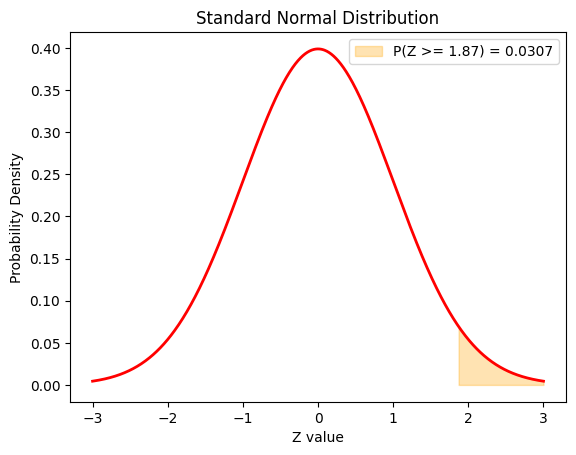

In [53]:
# Visualisering for P(Z >= 1.87)

# Generer x-værdier for en standard normalfordeling
x = np.linspace(-3, 3, 1000)
# Beregn PDF for standard normalfordeling
pdf = norm.pdf(x)

# Plot PDF for standard normalfordeling
plt.plot(x, pdf, 'r-', lw=2)

# Fyld området for P(Z >= 1.87)
plt.fill_between(x, pdf, where=(x >= 1.87), color='orange', alpha=0.3, label=f'P(Z >= 1.87) = {P_Z_ge_1_87:.4f}')

plt.title('Standard Normal Distribution')
plt.xlabel('Z value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#8.30

##Tekst forklaring

For at finde sandsynligheden $P(1.04 < Z < 2.03)$, hvor $Z$ er en standard normalfordelt stokastisk variabel, benytter vi den kumulative fordelingsfunktion (CDF) til at beregne sandsynligheden for, at $Z$ falder inden for dette specifikke interval.

Sandsynligheden for et interval kan findes ved at tage forskellen mellem de kumulative sandsynligheder for de øvre og nedre grænser af intervallet:

$P(1.04 < Z < 2.03) = P(Z < 2.03) - P(Z < 1.04)$


##Python

In [54]:
# Beregner P(1.04 < Z < 2.03) for en standard normalfordelt variabel Z
# Dette gøres ved at beregne P(Z < 2.03) - P(Z < 1.04)
P_1_04_lt_Z_lt_2_03 = norm.cdf(2.03) - norm.cdf(1.04)

P_1_04_lt_Z_lt_2_03

0.12799168068830913

##Visualisering

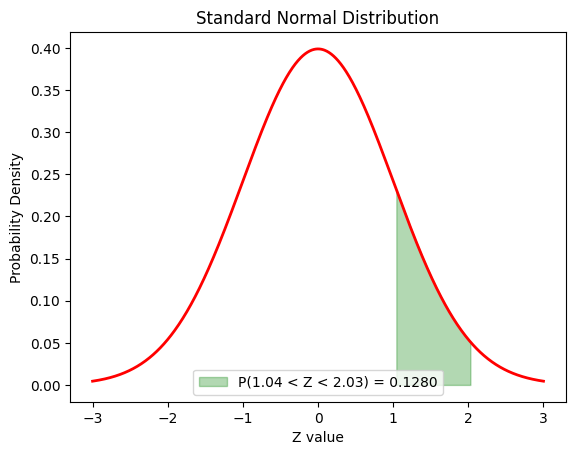

In [55]:
# Visualisering for P(1.04 < Z < 2.03)

# Plot PDF for standard normalfordeling
plt.plot(x, pdf, 'r-', lw=2)

# Fyld området for P(1.04 < Z < 2.03)
plt.fill_between(x, pdf, where=(x >= 1.04) & (x <= 2.03), color='green', alpha=0.3, label=f'P(1.04 < Z < 2.03) = {P_1_04_lt_Z_lt_2_03:.4f}')

plt.title('Standard Normal Distribution')
plt.xlabel('Z value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#8.40

##Tekst forklaring

X er normalfordelt med en middelværdi på $\mu = 1000$ og en standardafvigelse på $\sigma = 250$. For at finde sandsynligheden for, at $X$ er mellem 800 og 1.100, $P(800 < X < 1.100)$, kan vi først omregne disse $X$-værdier til $Z$-scores ved hjælp af transformationen:

$Z = \frac{X - \mu}{\sigma}$

Herefter anvender vi den kumulative fordelingsfunktion (CDF) for en standard normalfordeling til at finde sandsynligheden for, at $X$ falder inden for dette interval:

$P(800 < X < 1.100) = P(Z < \frac{1.100 - 1000}{250}) - P(Z < \frac{800 - 1000}{250})$


##Python

In [56]:
# Variablen X er normalfordelt med en middelværdi (mu) på 1000 og en standardafvigelse (sigma) på 250.
mu = 1000
sigma = 250

In [57]:
# Beregner P(800 < X < 1100) for denne normalfordeling
# Dette gøres ved at omregne X-værdierne til Z-scores og anvende CDF
Z_score_800 = (800 - mu) / sigma
Z_score_1100 = (1100 - mu) / sigma
Z_score_800, Z_score_1100

(-0.8, 0.4)

In [58]:
P_800_lt_X_lt_1100 = norm.cdf(Z_score_1100) - norm.cdf(Z_score_800)

In [59]:
P_800_lt_X_lt_1100

0.4435663430269275

##Visualisering

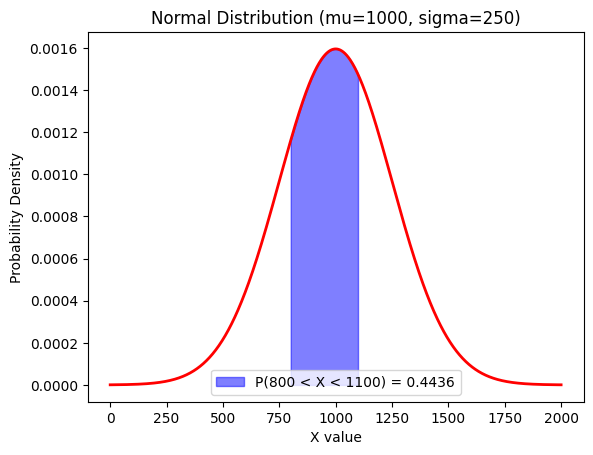

In [60]:
import numpy as np
from scipy.stats import norm

# Generate x values for plotting
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the PDF for these x values
pdf_values = norm.pdf(x_values, mu, sigma)

# Plot the PDF
plt.plot(x_values, pdf_values, 'r-', lw=2)

# Highlight the area under the curve for 800 < X < 1100
plt.fill_between(x_values, pdf_values, where=(800 < x_values) & (x_values < 1100), color='blue', alpha=0.5, label=f'P(800 < X < 1100) = {P_800_lt_X_lt_1100:.4f}')

plt.title('Normal Distribution (mu=1000, sigma=250)')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#8.41

##Tekst forklaring

For at bestemme ved hvilken værdi $X$ er kun 8\% under dens middelværdi for en normalfordelt variabel $X$ med middelværdi $\mu = 50$ og standardafvigelse $\sigma = 8$, beregner vi først den faktiske værdi, som er 8\% under middelværdien:

$X_{\text{8% under}} = \mu \times 0.92 = 46$

Dernæst beregner vi sandsynligheden for, at $X$ er mindre end denne værdi ved at anvende den kumulative fordelingsfunktion (CDF) for en normalfordeling. Den omregnede Z-score for $X_{\text{8% under}}$ er:

$Z = \frac{X_{\text{8% under}} - \mu}{\sigma}$

##Python

In [61]:
# Variablen X er normalfordelt med en middelværdi (mu) på 50 og en standardafvigelse (sigma) på 8.
mu = 50
sigma = 8

In [62]:
# Vi skal finde værdien af X, der er 8% under middelværdien.
# Først finder vi den faktiske værdi, som er 8% under middelværdien.
X_value_8_percent_under = mu * 0.92

In [63]:
# Herefter beregner vi sandsynligheden for, at X er mindre end denne værdi.
Z_score_X_value_8_percent_under = (X_value_8_percent_under - mu) / sigma

In [64]:
P_X_8_percent_under = norm.cdf(Z_score_X_value_8_percent_under)

X_value_8_percent_under, P_X_8_percent_under

(46.0, 0.3085375387259869)

##Visualisering

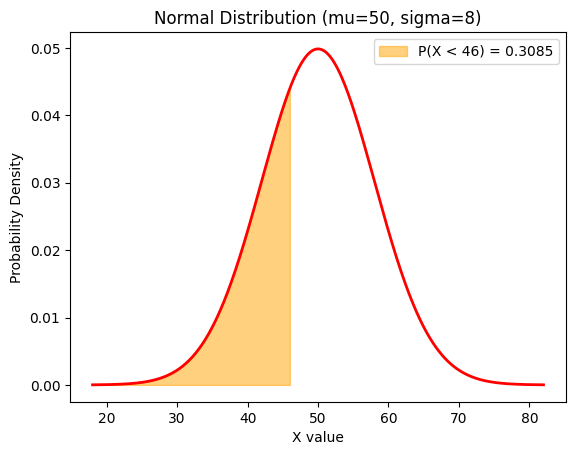

In [65]:
# Visualisering for P(X < X_value_8_percent_under)

# Generate x values for plotting
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the PDF for these x values
pdf_values = norm.pdf(x_values, mu, sigma)

# Plot the PDF
plt.plot(x_values, pdf_values, 'r-', lw=2)

# Highlight the area under the curve for X < X_value_8_percent_under
plt.fill_between(x_values, pdf_values, where=(x_values < X_value_8_percent_under), color='orange', alpha=0.5, label=f'P(X < 46) = {P_X_8_percent_under:.4f}')

plt.title('Normal Distribution (mu=50, sigma=8)')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#8.44

##Tekst forklaring

De livstidsprærer, der annonceres til at have en levetid på 5000 timer, er normalfordelt med en middelværdi på $\mu = 5100$ timer og en standardafvigelse på $\sigma = 200$ timer. For at finde sandsynligheden for, at pæren holder længere end annonceret, beregner vi først Z-scoren for 5000 timer:

$Z = \frac{5000 - \mu}{\sigma}$

Herefter finder vi sandsynligheden for, at $X$ (levetiden) er større end 5000 timer ved at beregne komplementet til den kumulative sandsynlighed for denne Z-score:

$P(X > 5000) = 1 - P(X < 5000) = 1 - \Phi(Z)$

Beregningen giver, at sandsynligheden for, at pæren holder længere end de annoncerede 5000 timer, er:

$P(X > 5000) \approx 0.6915$

Dette indikerer, at der er en 69.15\% sandsynlighed for, at pæren vil holde længere end de annoncerede 5000 timer.


##Python

In [66]:
# Livstidsprærens middelværdi og standardafvigelse
mu = 5100
sigma = 200

In [67]:
# Vi skal finde sandsynligheden for, at præren holder længere end annonceret (5000 timer)
# Omregner 5000 timer til Z-score
Z_score_5000 = (5000 - mu) / sigma
Z_score_5000

-0.5

In [68]:
# Beregner P(X > 5000) ved at finde komplementet til CDF for Z_score_5000
P_X_gt_5000 = 1 - norm.cdf(Z_score_5000)


In [69]:
P_X_gt_5000

0.6914624612740131

##Visualisering

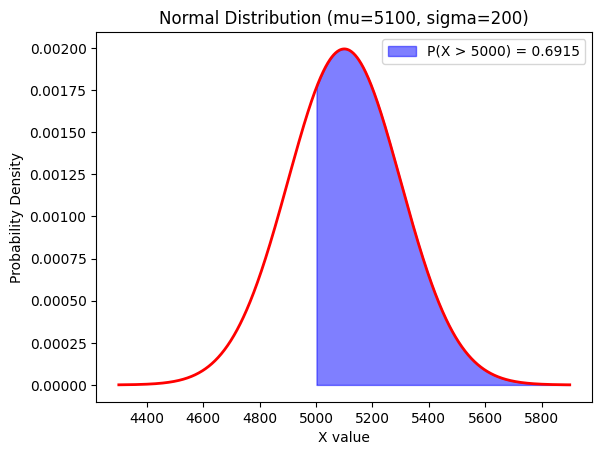

In [70]:
# Visualisering for P(X > 5000)

# Generate x values for plotting
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
# Calculate the PDF for these x values
pdf_values = norm.pdf(x_values, mu, sigma)

# Plot the PDF
plt.plot(x_values, pdf_values, 'r-', lw=2)

# Highlight the area under the curve for X > 5000
plt.fill_between(x_values, pdf_values, where=(x_values > 5000), color='blue', alpha=0.5, label=f'P(X > 5000) = {P_X_gt_5000:.4f}')

plt.title('Normal Distribution (mu=5100, sigma=200)')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


#8.45

##Tekst forklaring

Refererer til opgave 8.44, hvis vi ønsker at være sikre på, at 98\% af alle pærer holder længere end det, der annonceres, skal vi først finde den Z-score, der svarer til den nederste 2\% af fordelingen, fordi vi ønsker, at 98\% skal være over denne værdi. Ved hjælp af den kumulative fordelingsfunktion (CDF) finder vi:

$Z_{0.02} = \Phi^{-1}(0.02)$

Dernæst omregner vi denne Z-score tilbage til en X-værdi, som repræsenterer den annoncerede levetid, ved at anvende formlen for en normalfordelt variabel:

$X_{\text{annonceret}} = Z_{0.02} \cdot \sigma + \mu$

Beregningen giver, at for at være sikre på, at 98\% af alle pærer holder længere end det, der annonceres, bør levetiden, der annonceres med, være:

$X_{\text{annonceret}} \approx 4689 \text{ timer}$

Dette sikrer, at 98\% af pærerne vil holde længere end den annoncerede levetid.


##Python

In [71]:
# Vi ønsker at finde den annoncerede levetid, der sikrer, at 98% af alle pærer holder længere end dette.
# Finder den Z-score der svarer til den nederste 2% (da vi ønsker 98% over denne værdi)
Z_score_98_percentile = norm.ppf(0.02)

In [72]:
# Omregner Z-score tilbage til X-værdi (levetid)
X_announced_time = Z_score_98_percentile * sigma + mu

X_announced_time

4689.250217873636

##Visualisering

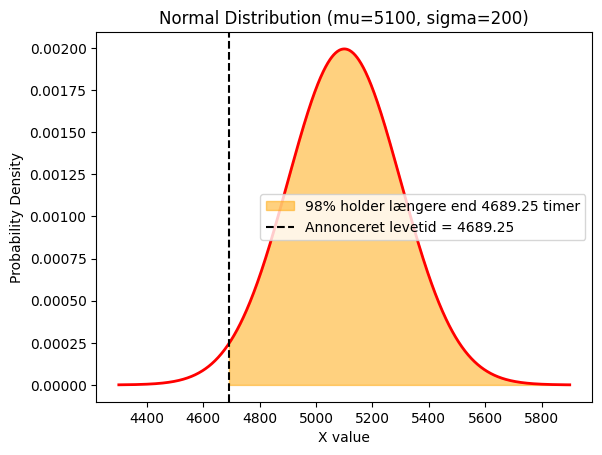

In [73]:
# Visualisering for annonceret levetid der sikrer 98% længere levetid

# Plot the PDF
plt.plot(x_values, pdf_values, 'r-', lw=2)

# Highlight the area under the curve for X > X_announced_time
plt.fill_between(x_values, pdf_values, where=(x_values > X_announced_time), color='orange', alpha=0.5, label=f'98% holder længere end {X_announced_time:.2f} timer')

plt.title('Normal Distribution (mu=5100, sigma=200)')
plt.xlabel('X value')
plt.ylabel('Probability Density')
plt.axvline(X_announced_time, color='black', linestyle='--', label=f'Annonceret levetid = {X_announced_time:.2f}')
plt.legend()
plt.show()

#8.85

##Tekst forklaring

Disse værdier repræsenterer de kritiske t-værdier ved de angivne signifikansniveauer og frihedsgrader, som kan bruges i statistiske tests, såsom t-tests, for at bestemme, om der er signifikante forskelle mellem middelværdierne af to sæt data.

##Python

In [74]:
from scipy.stats import t

# Beregner de angivne t-værdier for de forskellige frihedsgrader
t_values = {
    "a": t.ppf(1 - 0.10, 15),
    "b": t.ppf(1 - 0.10, 23),
    "c": t.ppf(1 - 0.025, 83),
    "d": t.ppf(1 - 0.05, 195),
}

t_values

{'a': 1.3406056078504547,
 'b': 1.3194602391408932,
 'c': 1.988959779987179,
 'd': 1.6527053097707547}

##Visualisering

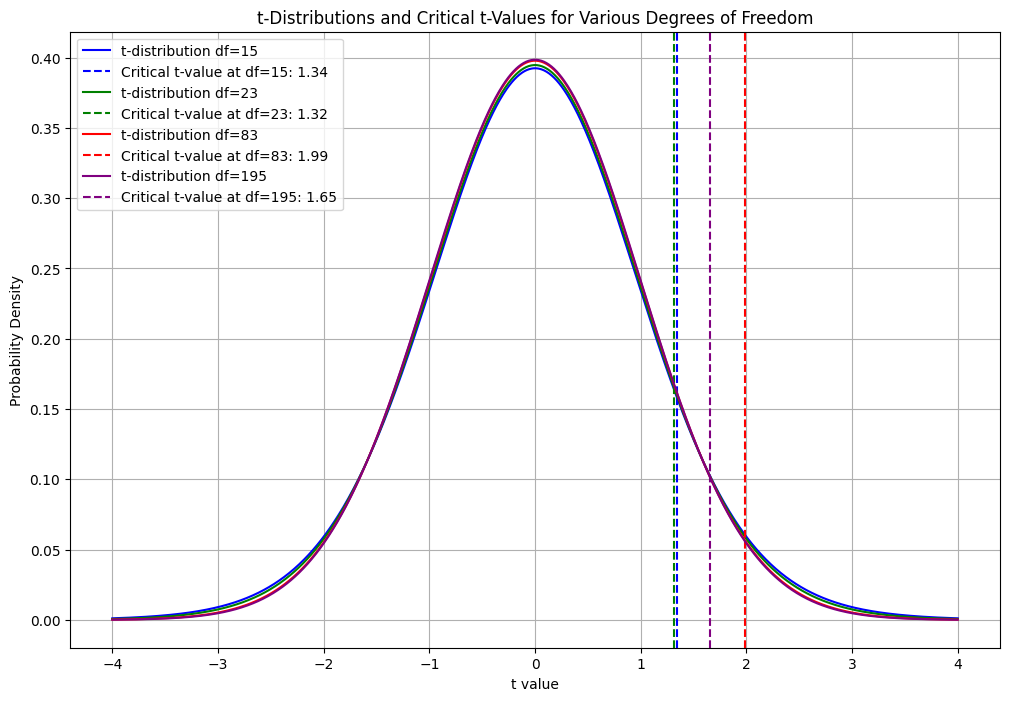

In [75]:
# Definerer x-værdierne for plotting af t-fordelinger
x_range = np.linspace(-4, 4, 1000)

plt.figure(figsize=(12, 8))

# Forbereder data for plotting
dfs = [15, 23, 83, 195]  # Liste af frihedsgrader
colors = ['blue', 'green', 'red', 'purple']  # Farver for de forskellige plots
labels = ['df=15', 'df=23', 'df=83', 'df=195']  # Labels for frihedsgrader

# Plotter t-fordelingerne og markerer de kritiske t-værdier
for df, color, label, (key, t_val) in zip(dfs, colors, labels, t_values.items()):
    pdf = t.pdf(x_range, df)
    plt.plot(x_range, pdf, label=f't-distribution {label}', color=color)
    plt.axvline(x=t_val, color=color, linestyle='--', label=f'Critical t-value at {label}: {t_val:.2f}')

plt.title('t-Distributions and Critical t-Values for Various Degrees of Freedom')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#8.86

##Tekst forklaring

De beregnede sandsynligheder for at overskride de specifikke $t$-værdier med de tilsvarende frihedsgrader er som følger:

a. Sandsynligheden for, at $t$ med 64 frihedsgrader overskrider 2.12, er $P(t_{64} > 2.12) = 0.0189$. Dette indikerer, at der er en 1.89\% chance for at observere en $t$-værdi større end 2.12 under den givne fordeling.

b. Sandsynligheden for, at $t$ med 27 frihedsgrader overskrider 1.90, er $P(t_{27} > 1.90) = 0.0341$. Dette viser, at der er en 3.41\% chance for at observere en $t$-værdi større end 1.90.

c. Sandsynligheden for, at $t$ med 159 frihedsgrader overskrider 1.33, er $P(t_{159} > 1.33) = 0.0927$. Dette betyder, at der er en 9.27\% sandsynlighed for at observere en $t$-værdi større end 1.33.

d. Sandsynligheden for, at $t$ med 550 frihedsgrader overskrider 1.85, er $P(t_{550} > 1.85) = 0.0324$. Dette indikerer, at der er en 3.24\% chance for at observere en $t$-værdi større end 1.85.

Disse værdier angiver sandsynligheden for at finde en $t$-værdi større end den angivne værdi i en $t$-fordeling med det tilsvarende antal frihedsgrader, hvilket er nyttigt i konteksten af hypotesetests.


##Python

In [76]:
# Beregner sandsynlighederne for de angivne t-værdier og frihedsgrader
probabilities = {
    "a": 1 - t.cdf(2.12, 64),
    "b": 1 - t.cdf(1.90, 27),
    "c": 1 - t.cdf(1.33, 159),
    "d": 1 - t.cdf(1.85, 550),
}

probabilities

{'a': 0.01894446919003967,
 'b': 0.03408115574716131,
 'c': 0.09271147996526496,
 'd': 0.03242486080673135}

##Visualisering

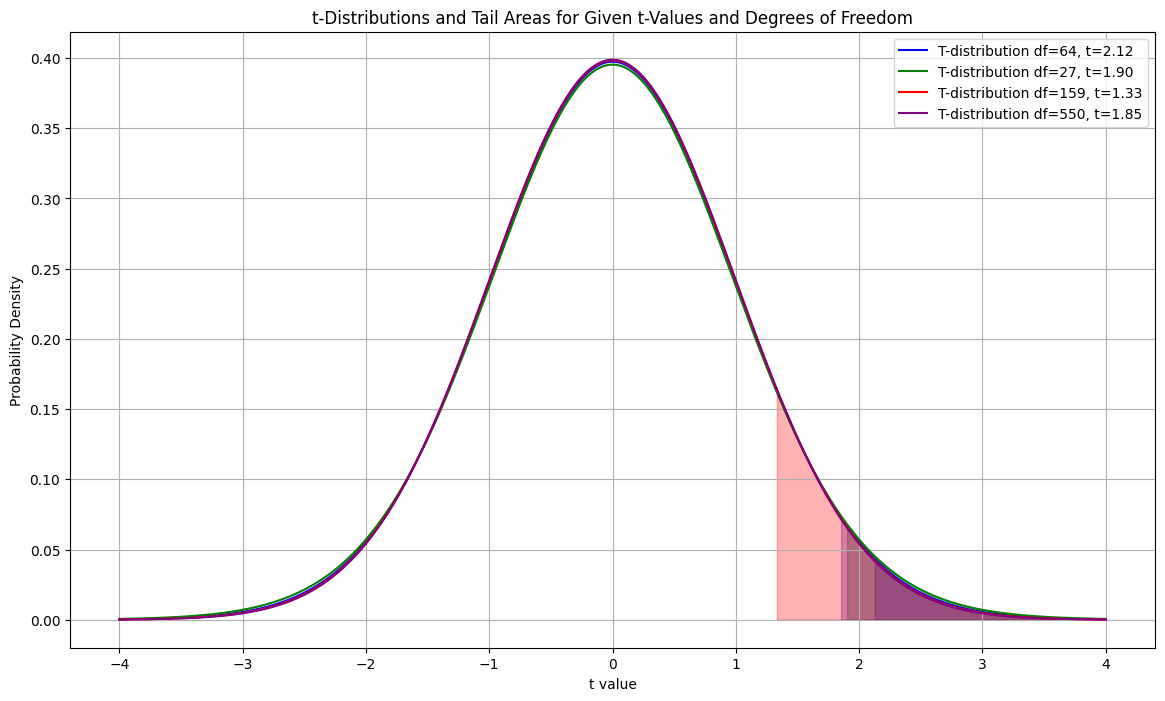

In [77]:
# Opdaterer x_range til at være egnet for t-fordelinger visualisering
x_range = np.linspace(-4, 4, 1000)

# Plotter t-fordelingen og markerer de kritiske t-værdier for alle fire angivne frihedsgrader og sandsynligheder
plt.figure(figsize=(14, 8))

# Definerer frihedsgrader og t-værdier for plotting
dfs = [64, 27, 159, 550]
t_values_plot = [2.12, 1.90, 1.33, 1.85]
labels = ['df=64, t=2.12', 'df=27, t=1.90', 'df=159, t=1.33', 'df=550, t=1.85']
colors = ['blue', 'green', 'red', 'purple']

for df, t_val, label, color in zip(dfs, t_values_plot, labels, colors):
    # Beregner PDF for t-fordelingen for den givne frihedsgrad
    pdf = t.pdf(x_range, df)
    plt.plot(x_range, pdf, label=f'T-distribution {label}', color=color)

    # Highlight area to the right of the t-value
    plt.fill_between(x_range, 0, pdf, where=(x_range > t_val), color=color, alpha=0.3)

# Tilføj yderligere plotdetaljer
plt.title('t-Distributions and Tail Areas for Given t-Values and Degrees of Freedom')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#8.88

##Tekst forklaring

De beregnede $\chi^2$-værdier for de angivne frihedsgrader og konfidensniveauer er som følger:

a. Kritisk værdi for $\chi^2$ med 66 frihedsgrader ved et konfidensniveau på 0.75 (1 - 0.25) er $\chi^2_{0.25,66} = 73.3441$.

b. Kritisk værdi for $\chi^2$ med 100 frihedsgrader ved et konfidensniveau på 0.60 (1 - 0.40) er $\chi^2_{0.40,100} = 102.9459$.

c. Kritisk værdi for $\chi^2$ med 17 frihedsgrader ved et konfidensniveau på 0.50 er $\chi^2_{0.50,17} = 16.3382$.

d. Kritisk værdi for $\chi^2$ med 17 frihedsgrader ved et konfidensniveau på 0.90 (1 - 0.10) er $\chi^2_{0.10,17} = 24.7690$.

Disse værdier angiver de kritiske punkter af $\chi^2$-fordelingen, som er anvendelige i statistiske analyser for at bedømme fit eller for at opstille konfidensintervaller for varians.


##Python

In [78]:
from scipy.stats import chi2

# Beregner de angivne chi^2-værdier for de forskellige frihedsgrader og konfidensniveauer
chi2_values = {
    "a": chi2.ppf(1 - 0.25, 66),
    "b": chi2.ppf(1 - 0.40, 100),
    "c": chi2.ppf(1 - 0.50, 17),
    "d": chi2.ppf(1 - 0.10, 17),
}

chi2_values

{'a': 73.34409269646494,
 'b': 102.9459442154568,
 'c': 16.338182377392467,
 'd': 24.76903534390146}

##Visualisering

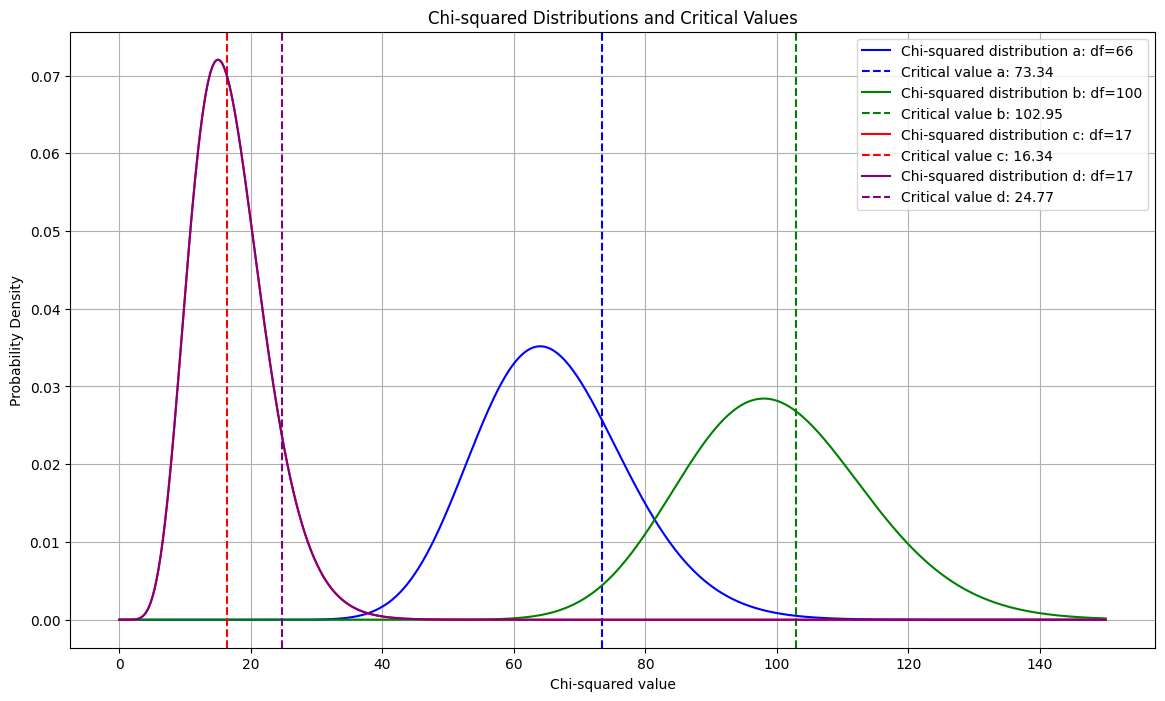

In [79]:
# Opdaterer x_range til at være egnet for chi^2-fordelinger visualisering
x_range = np.linspace(0, 150, 1000)

# Plotter chi^2-fordelingen og markerer de beregnede chi^2-værdier
plt.figure(figsize=(14, 8))

# Definerer labels og farver for hvert plot
labels = ["a: df=66", "b: df=100", "c: df=17", "d: df=17"]
colors = ["blue", "green", "red", "purple"]
dfs = [66, 100, 17, 17]  # Frihedsgrader for hvert plot

for key, label, color, df in zip(chi2_values.keys(), labels, colors, dfs):
    pdf = chi2.pdf(x_range, df)
    plt.plot(x_range, pdf, label=f'Chi-squared distribution {label}', color=color)
    plt.axvline(chi2_values[key], color=color, linestyle='--', label=f'Critical value {key}: {chi2_values[key]:.2f}')

plt.title('Chi-squared Distributions and Critical Values')
plt.xlabel('Chi-squared value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#8.89

##Tekst forklaring

De beregnede sandsynligheder for at overskride de specifikke $\chi^2$-værdier med de tilsvarende frihedsgrader er som følger:

a. Sandsynligheden for, at $\chi^2$ med 73 frihedsgrader overskrider 80, er $P(\chi^2_{73} > 80) = 0.2688$. Dette indikerer, at der er en 26.88\% chance for at observere en $\chi^2$-værdi større end 80 under den givne fordeling.

b. Sandsynligheden for, at $\chi^2$ med 200 frihedsgrader overskrider 125, er $P(\chi^2_{200} > 125) = 0.99999$. Dette viser, at der er næsten en sikkerhed for at observere en $\chi^2$-værdi større end 125.

c. Sandsynligheden for, at $\chi^2$ med 88 frihedsgrader overskrider 60, er $P(\chi^2_{88} > 60) = 0.9903$. Dette betyder, at der er en 99.03\% sandsynlighed for at observere en $\chi^2$-værdi større end 60.

d. Sandsynligheden for, at $\chi^2$ med 1000 frihedsgrader overskrider 450, er $P(\chi^2_{1000} > 450) = 1.0$. Dette indikerer, at der er en 100\% chance for at observere en $\chi^2$-værdi større end 450.

Disse værdier angiver sandsynligheden for at finde en $\chi^2$-værdi større end den angivne værdi i en $\chi^2$-fordeling, hvilket er nyttigt i statistiske analyser.

##Python

In [80]:
# Beregner sandsynlighederne for de angivne chi^2-værdier og frihedsgrader
chi2_probabilities = {
    "a": 1 - chi2.cdf(80, 73),
    "b": 1 - chi2.cdf(125, 200),
    "c": 1 - chi2.cdf(60, 88),
    "d": 1 - chi2.cdf(450, 1000),
}

chi2_probabilities

{'a': 0.2687621857976922,
 'b': 0.9999923544742048,
 'c': 0.9902648039501418,
 'd': 1.0}

##Visualisering

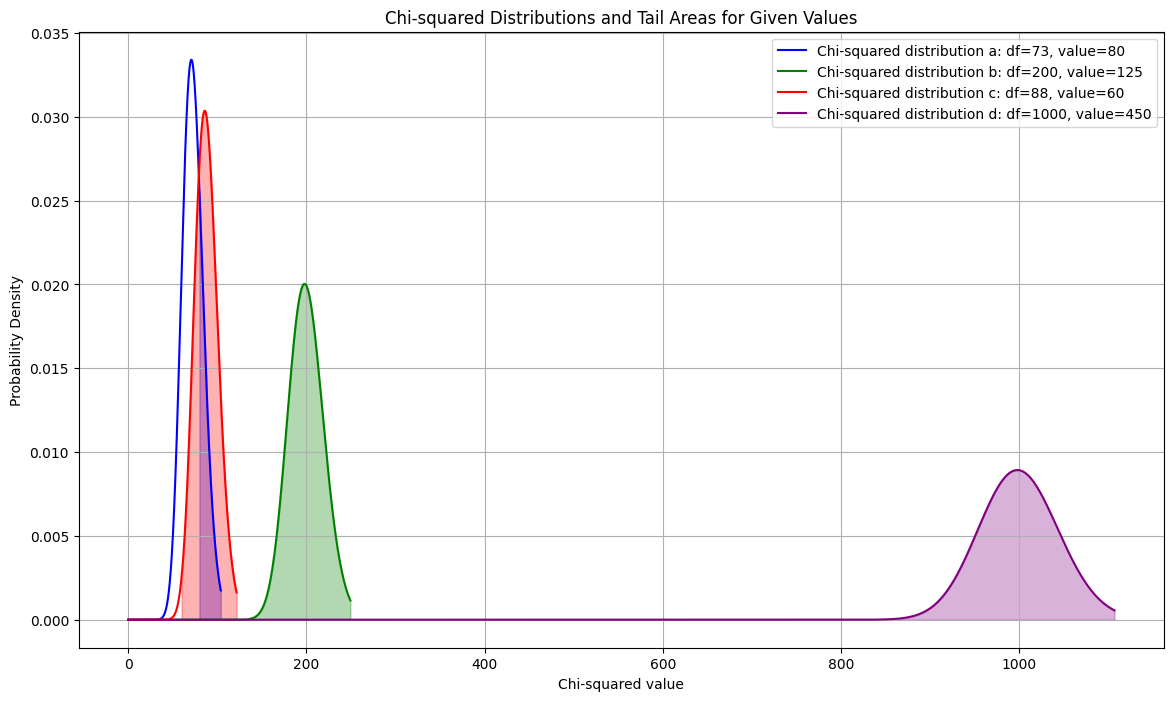

In [81]:
plt.figure(figsize=(14, 8))

# Definerer værdier og farver for hvert plot
chi2_values_for_plot = [80, 125, 60, 450]
dfs_for_plot = [73, 200, 88, 1000]
labels_for_plot = ["a: df=73, value=80", "b: df=200, value=125", "c: df=88, value=60", "d: df=1000, value=450"]
colors_for_plot = ["blue", "green", "red", "purple"]

for value, df, label, color in zip(chi2_values_for_plot, dfs_for_plot, labels_for_plot, colors_for_plot):
    x_range = np.linspace(0, chi2.ppf(0.99, df), 1000)
    pdf = chi2.pdf(x_range, df)
    plt.plot(x_range, pdf, label=f'Chi-squared distribution {label}', color=color)
    plt.fill_between(x_range, 0, pdf, where=(x_range > value), color=color, alpha=0.3)

plt.title('Chi-squared Distributions and Tail Areas for Given Values')
plt.xlabel('Chi-squared value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#8.91

##Tekst forklaring

De beregnede $F$-værdier for de angivne frihedsgrader og signifikansniveauer er som følger:

a. Kritisk værdi for $F$ med 70 og 70 frihedsgrader ved et signifikansniveau på 0.05 er $F_{0.05, 70, 70} = 1.4857$.

b. Kritisk værdi for $F$ med 45 og 100 frihedsgrader ved et signifikansniveau på 0.01 er $F_{0.01, 45, 100} = 1.7633$.

c. Kritisk værdi for $F$ med 36 og 50 frihedsgrader ved et signifikansniveau på 0.025 er $F_{0.025, 36, 50} = 1.8200$.

d. Kritisk værdi for $F$ med 500 og 500 frihedsgrader ved et signifikansniveau på 0.05 er $F_{0.05, 500, 500} = 1.1587$.

Disse værdier angiver de kritiske punkter af $F$-fordelingen, som er anvendelige i statistiske analyser, såsom variansanalyse (ANOVA), for at bedømme forskelle mellem gruppers varianser.


##Python

In [82]:
from scipy.stats import f

# Beregner de angivne F-værdier for de forskellige frihedsgrader og signifikansniveauer
F_values = {
    "a": f.ppf(1 - 0.05, 70, 70),
    "b": f.ppf(1 - 0.01, 45, 100),
    "c": f.ppf(1 - 0.025, 36, 50),
    "d": f.ppf(1 - 0.05, 500, 500),
}

F_values

{'a': 1.4856889745422956,
 'b': 1.7632554383173995,
 'c': 1.8200340597662605,
 'd': 1.1586553765546113}

##Visualisering

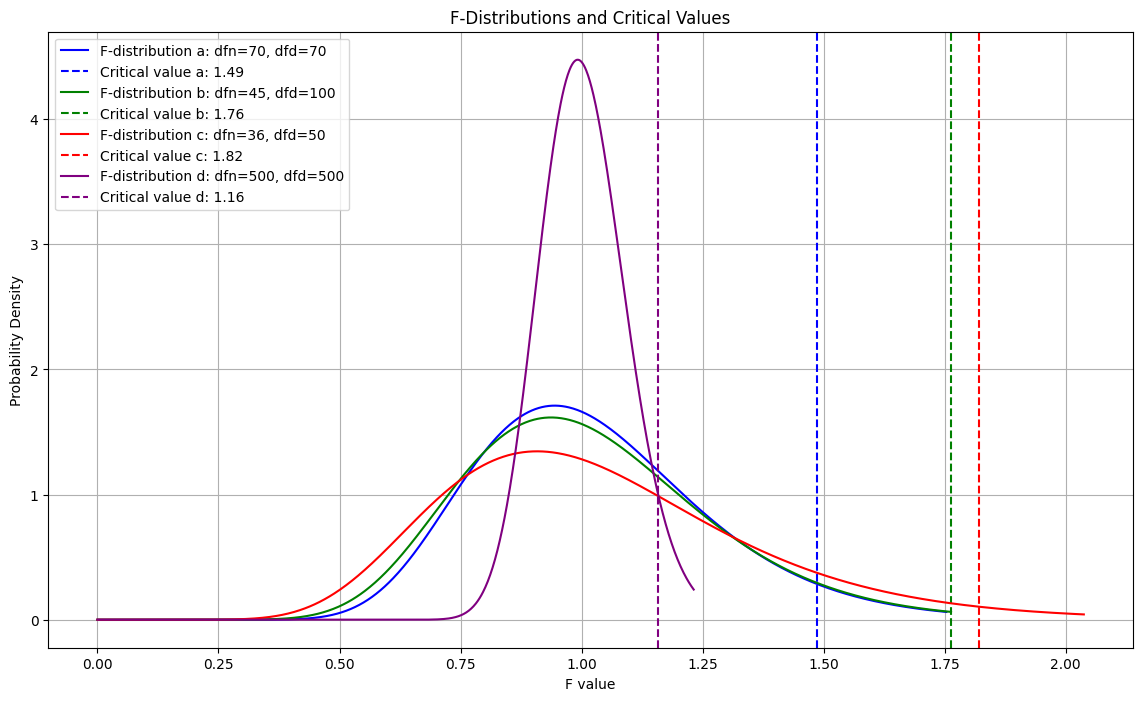

In [83]:
# Genererer x-værdier for F-fordelingens plot
x_range_f = np.linspace(0, 3, 1000)

# Plotter F-fordelingen og markerer de beregnede F-værdier
plt.figure(figsize=(14, 8))

# Definerer labels og farver for hvert plot
labels_f = ["a: dfn=70, dfd=70", "b: dfn=45, dfd=100", "c: dfn=36, dfd=50", "d: dfn=500, dfd=500"]
colors_f = ["blue", "green", "red", "purple"]
dfs_n = [70, 45, 36, 500]  # Numerator degrees of freedom
dfs_d = [70, 100, 50, 500]  # Denominator degrees of freedom

for (dfn, dfd, label, color), f_value in zip(zip(dfs_n, dfs_d, labels_f, colors_f), F_values.values()):
    x_range_specific = np.linspace(0, f.ppf(0.99, dfn, dfd), 1000)
    pdf_f = f.pdf(x_range_specific, dfn, dfd)
    plt.plot(x_range_specific, pdf_f, label=f'F-distribution {label}', color=color)
    plt.axvline(f_value, color=color, linestyle='--', label=f'Critical value {label.split(":")[0]}: {f_value:.2f}')

plt.title('F-Distributions and Critical Values')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#8.92

##Tekst forklaring

De beregnede sandsynligheder for at overskride de specifikke $F$-værdier med de tilsvarende frihedsgrader er som følger:

a. Sandsynligheden for, at $F$ med 7 og 20 frihedsgrader overskrider 2.5, er $P(F_{7, 20} > 2.5) = 0.0510$. Dette indikerer, at der er en 5.10\% chance for at observere en $F$-værdi større end 2.5 under den givne fordeling.

b. Sandsynligheden for, at $F$ med 18 og 63 frihedsgrader overskrider 1.4, er $P(F_{18, 63} > 1.4) = 0.1634$. Dette viser, at der er en 16.34\% chance for at observere en $F$-værdi større end 1.4.

c. Sandsynligheden for, at $F$ med 34 og 62 frihedsgrader overskrider 1.8, er $P(F_{34, 62} > 1.8) = 0.0222$. Dette betyder, at der er en 2.22\% sandsynlighed for at observere en $F$-værdi større end 1.8.

d. Sandsynligheden for, at $F$ med 200 og 400 frihedsgrader overskrider 1.1, er $P(F_{200, 400} > 1.1) = 0.2133$. Dette indikerer, at der er en 21.33\% chance for at observere en $F$-værdi større end 1.1.

Disse værdier angiver sandsynligheden for at finde en $F$-værdi større end den angivne værdi i en $F$-fordeling, hvilket er nyttigt i statistiske analyser, såsom i variansanalyse (ANOVA).


##Python

In [84]:
# Beregner sandsynlighederne for de angivne F-værdier og frihedsgrader
F_probabilities = {
    "a": 1 - f.cdf(2.5, 7, 20),
    "b": 1 - f.cdf(1.4, 18, 63),
    "c": 1 - f.cdf(1.8, 34, 62),
    "d": 1 - f.cdf(1.1, 200, 400),
}

F_probabilities

{'a': 0.05101676660277554,
 'b': 0.1633647067817522,
 'c': 0.022243140373234493,
 'd': 0.21326603967938207}

##Visualisering

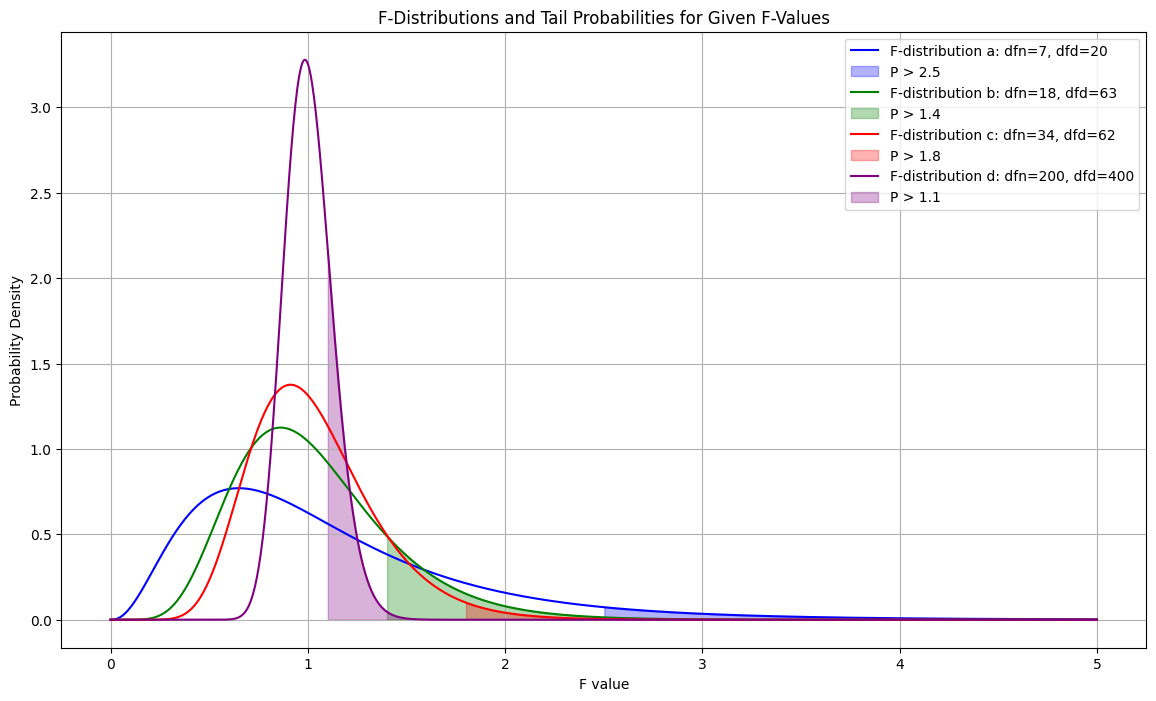

In [85]:
# Opdaterer x_range_f til at være egnet for F-fordelinger visualisering for de nye værdier
x_range_f = np.linspace(0, 5, 1000)

# Plotter F-fordelingen og markerer de sandsynligheder for overstigelse
plt.figure(figsize=(14, 8))

# Definerer frihedsgrader og F-værdier for plotting
dfs_n_for_prob = [7, 18, 34, 200]  # Numerator degrees of freedom
dfs_d_for_prob = [20, 63, 62, 400]  # Denominator degrees of freedom
F_values_for_prob = [2.5, 1.4, 1.8, 1.1]
labels_for_prob = ["a: dfn=7, dfd=20", "b: dfn=18, dfd=63", "c: dfn=34, dfd=62", "d: dfn=200, dfd=400"]
colors_for_prob = ["blue", "green", "red", "purple"]

for dfn, dfd, F_val, label, color in zip(dfs_n_for_prob, dfs_d_for_prob, F_values_for_prob, labels_for_prob, colors_for_prob):
    x_range_specific = np.linspace(0, max(5, F_val + 1), 1000)
    pdf_f = f.pdf(x_range_specific, dfn, dfd)
    plt.plot(x_range_specific, pdf_f, label=f'F-distribution {label}', color=color)
    plt.fill_between(x_range_specific, 0, pdf_f, where=(x_range_specific > F_val), color=color, alpha=0.3, label=f'P > {F_val}')

plt.title('F-Distributions and Tail Probabilities for Given F-Values')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
